In [1]:
import pandas as pd

df = pd.read_excel('data/xlsx/PreciosOF.xlsx')
print(df)


      Unnamed: 0      Fecha  Compra   Venta
0              0 2023-01-26  183.74  192.74
1              1 2023-01-25  183.26  192.26
2              2 2023-01-24  183.08  192.08
3              3 2023-01-23  182.68  191.68
4              4 2023-01-20  181.65  190.65
...          ...        ...     ...     ...
3217        3217 2010-01-08    3.79    3.83
3218        3218 2010-01-07    3.79    3.83
3219        3219 2010-01-06    3.79    3.83
3220        3220 2010-01-05    3.78    3.82
3221        3221 2010-01-04    3.78    3.82

[3222 rows x 4 columns]


In [2]:
df = pd.DataFrame(df)
df

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-26,183.74,192.74
1,1,2023-01-25,183.26,192.26
2,2,2023-01-24,183.08,192.08
3,3,2023-01-23,182.68,191.68
4,4,2023-01-20,181.65,190.65
...,...,...,...,...
3217,3217,2010-01-08,3.79,3.83
3218,3218,2010-01-07,3.79,3.83
3219,3219,2010-01-06,3.79,3.83
3220,3220,2010-01-05,3.78,3.82


In [3]:
df.head()

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-26,183.74,192.74
1,1,2023-01-25,183.26,192.26
2,2,2023-01-24,183.08,192.08
3,3,2023-01-23,182.68,191.68
4,4,2023-01-20,181.65,190.65


In [4]:
df.index # it is an attribute, not function

RangeIndex(start=0, stop=3222, step=1)

In [5]:
df.drop(df.index[0], inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={0: 'Fecha', 1: 'Compra', 2: 'Venta'}, inplace=True)
df

,Fecha,Compra,Venta
1,2023-01-25,183.26,192.26
2,2023-01-24,183.08,192.08
3,2023-01-23,182.68,191.68
4,2023-01-20,181.65,190.65
5,2023-01-19,181.20,190.20
...,...,...,...
3217,2010-01-08,3.79,3.83
3218,2010-01-07,3.79,3.83
3219,2010-01-06,3.79,3.83
3220,2010-01-05,3.78,3.82


In [6]:
df.describe()

,Compra,Venta
count,3221.000000,3221.000000
mean,35.043058,36.911021
std,41.638150,44.139628
min,3.780000,3.820000
25%,5.130000,5.180000
50%,14.870000,15.270000
75%,57.940000,62.970000
max,183.260000,192.260000


In [7]:
df['Compra'] = pd.to_numeric(df['Compra'])
df['Venta'] = pd.to_numeric(df['Venta'])

In [8]:
df.to_pickle('data/pkl/PreciosOF.xlsx.pkl')

In [9]:
df.set_index('Fecha', inplace=True)
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

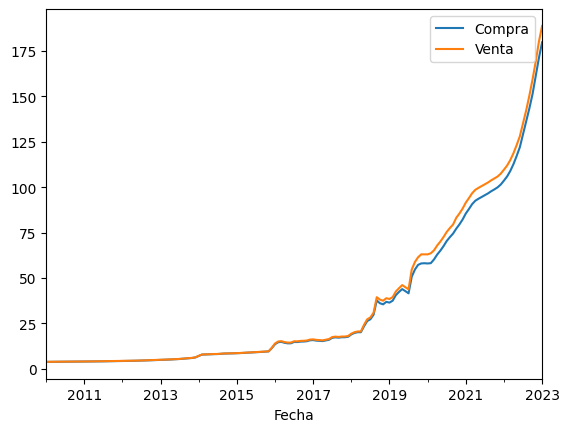

In [10]:
df.resample(rule='M').mean().plot(); # Historico

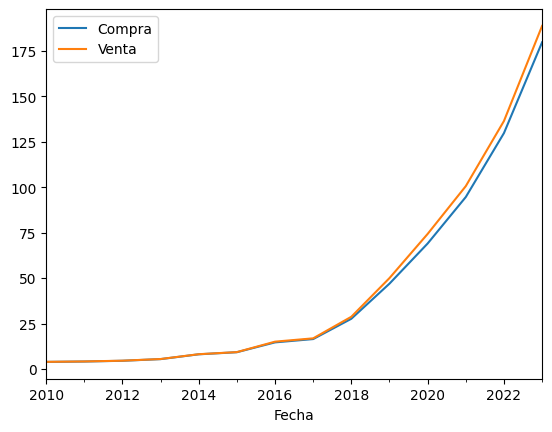

In [11]:
df.resample(rule='AS').mean().plot(); # AS Primer año

[Text(0.5, 1.0, 'Promedio valor Dolar')]

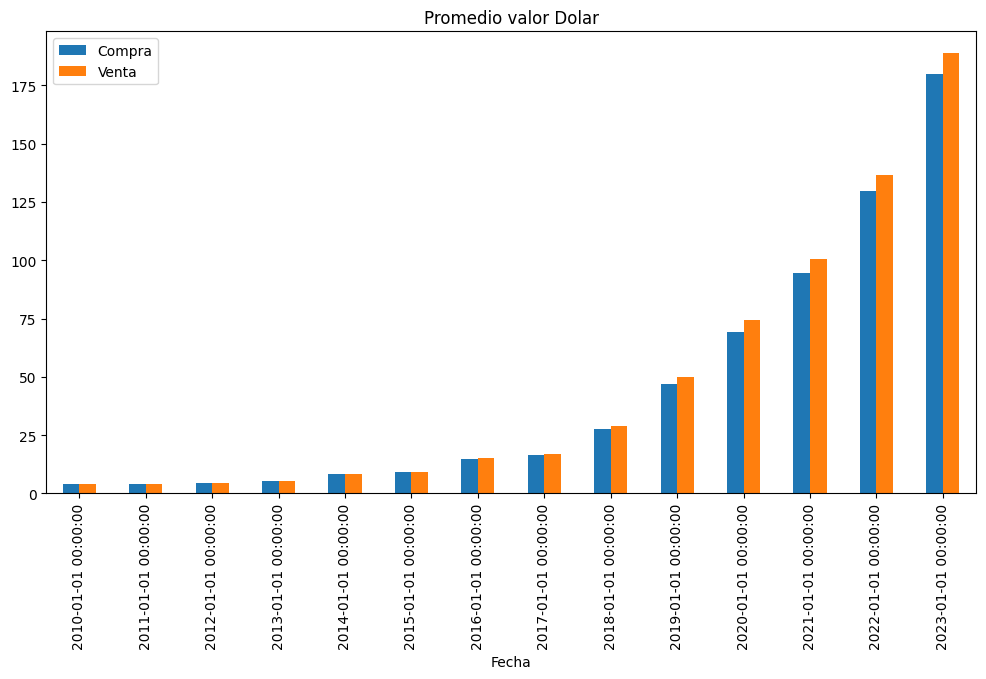

In [12]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Promedio valor Dolar')

<AxesSubplot:xlabel='Fecha'>

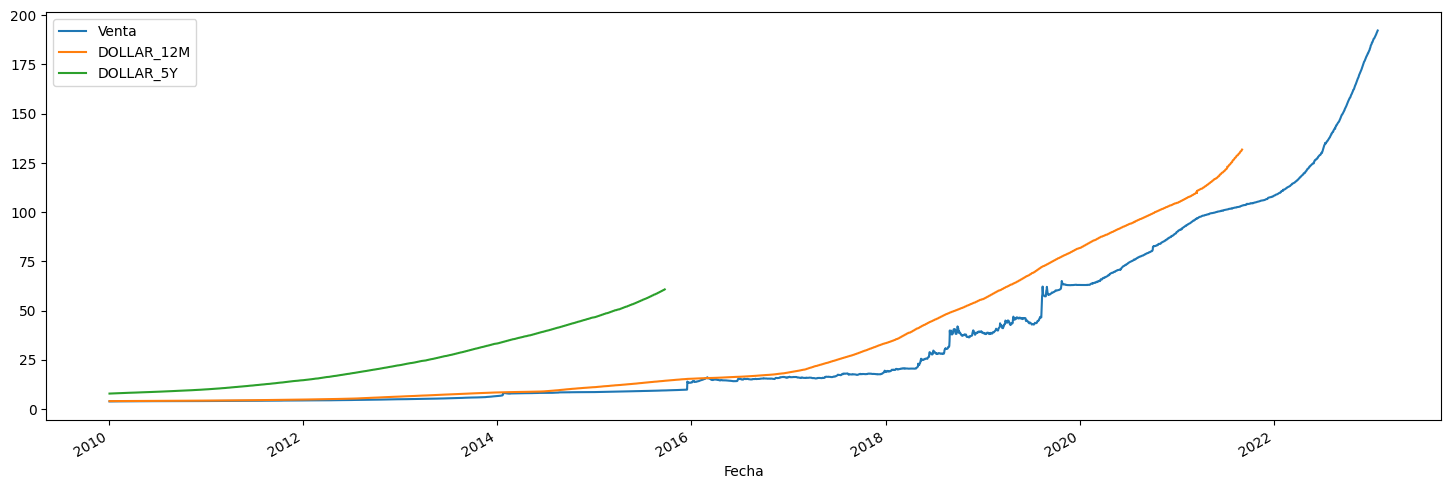

In [13]:
df['DOLLAR_12M'] = df['Venta'].rolling(window=365).mean()
df['DOLLAR_5Y'] = df['Venta'].rolling(window=365*5+1).mean()
df[['Venta','DOLLAR_12M','DOLLAR_5Y']].plot(figsize=(18,6))

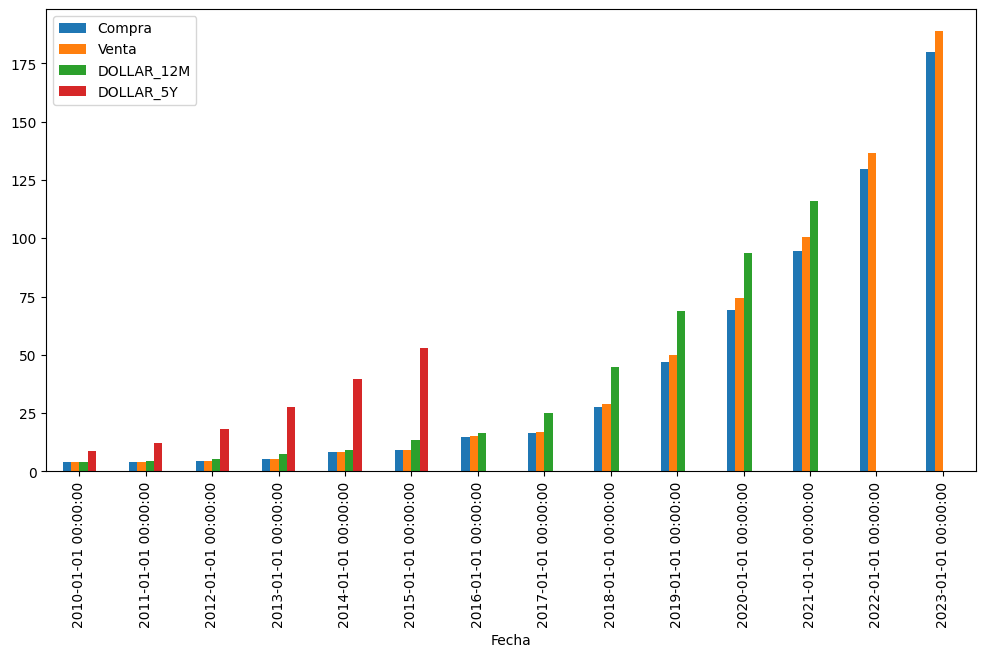

In [14]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))

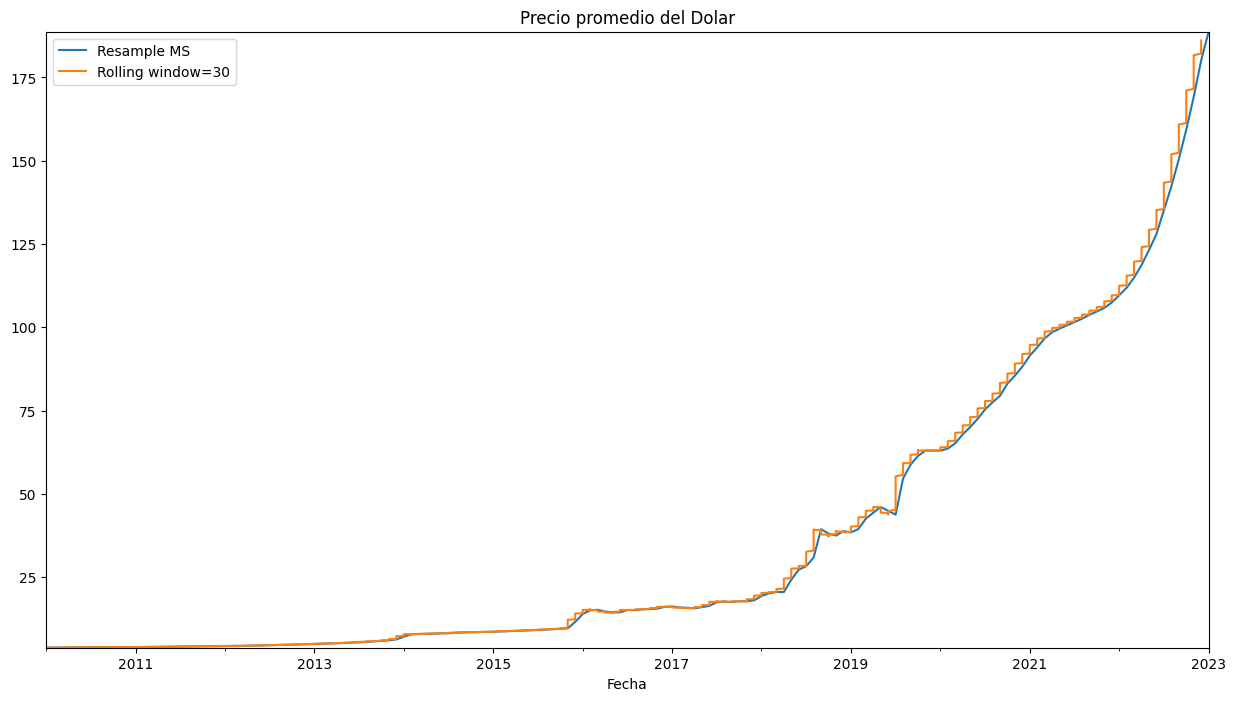

In [15]:
ax = df['Venta'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(label='Rolling window=30') # monthly rolling windows/moving average
ax.set(title='Precio promedio del Dolar')
ax.legend()

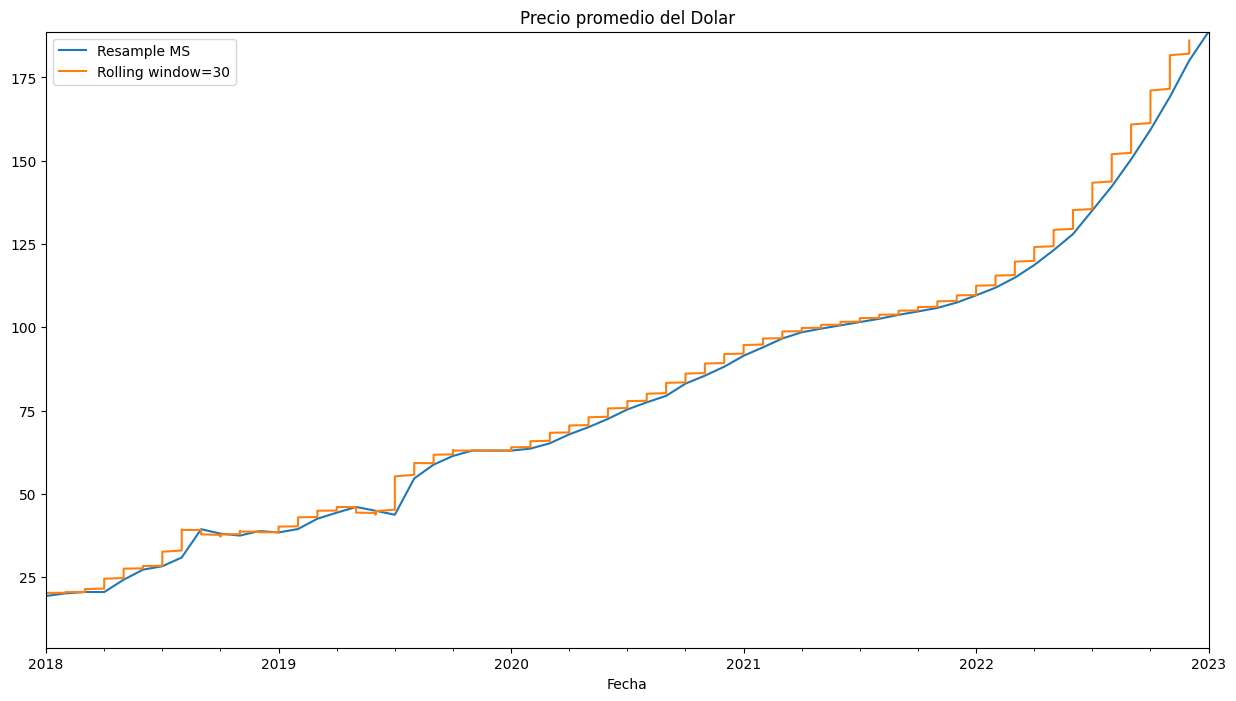

In [16]:
from datetime import datetime

ax = df['Venta'].resample(rule='M').mean().plot(xlim=['2018-01-01', datetime.now()], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(xlim=['2018-01-01',datetime.now()],label='Rolling window=30')
ax.set(title='Precio promedio del Dolar')
ax.legend()


<AxesSubplot:xlabel='Fecha'>

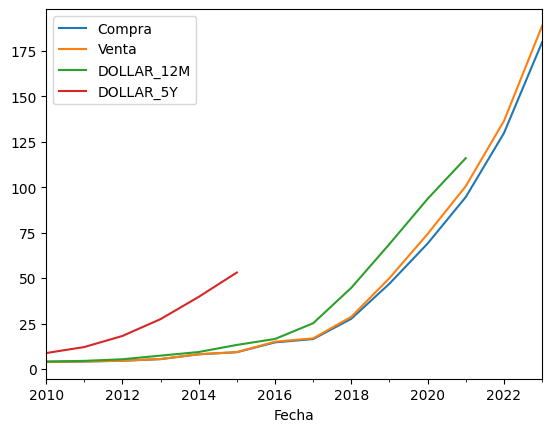

In [17]:
df.resample(rule='1y').mean().plot() #1y = 1 years

<AxesSubplot:xlabel='Fecha'>

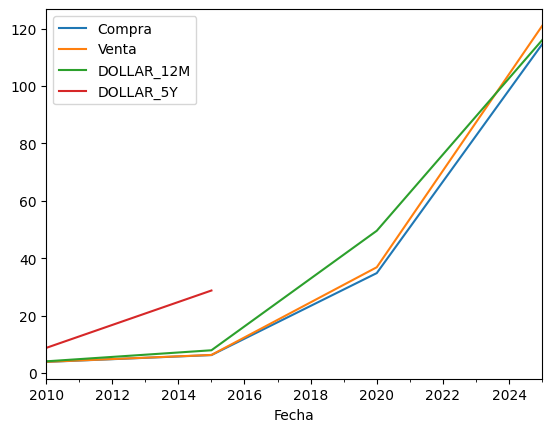

In [18]:
df.resample(rule='5y').mean().plot() #5y = 5 years

<AxesSubplot:xlabel='Fecha'>

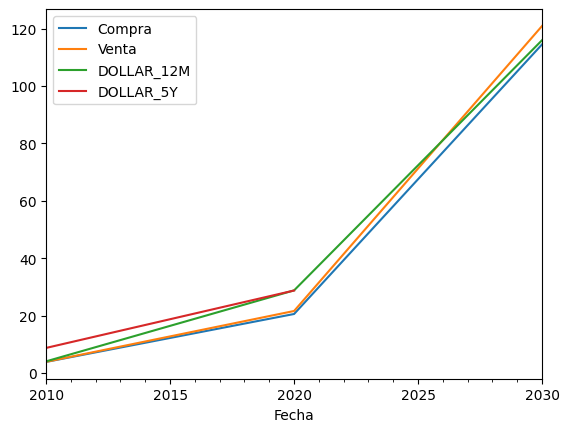

In [19]:
df.resample(rule='10y').mean().plot()

<AxesSubplot:xlabel='Fecha'>

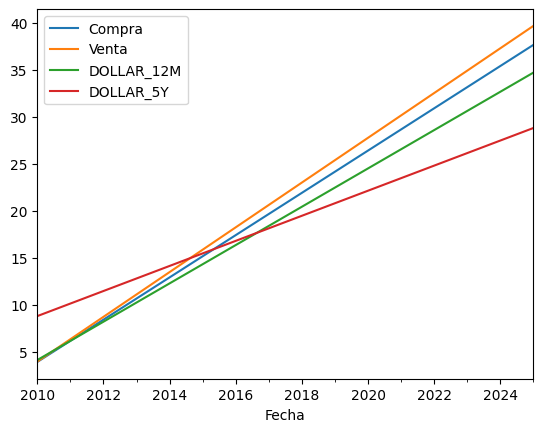

In [20]:
df.resample(rule='15y').mean().plot()